6 Analysis

In [1]:
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # all | last | last_expr | none 

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from analyse import findpeaks

6.2 Solving the problem

Reading the input

In [5]:
x=np.genfromtxt('photopl.txt',dtype=None,delimiter=None,skip_header=4)
x=x.reshape(x.size,1)
x[0:5]

array([[142],
       [127],
       [107],
       [103],
       [ 78]])

In [6]:
x=x/np.std(x)
x[0:5]

array([[ 1.56609859],
       [ 1.40066564],
       [ 1.18008837],
       [ 1.13597292],
       [ 0.86025134]])

Plotting the signal

In [7]:
fs=40.0
N=np.size(x)
t = np.arange(0, N) / fs
t = t.reshape(t.size, 1)
ind, peaks = findpeaks(x)
N

1051

Text(0.5,0,'t [sek]')

Text(0,0.5,'x(t)')

[0, array([ 26.25]), -1.5, 4.5]

[ 6.  4.]
[ 8.  3.]


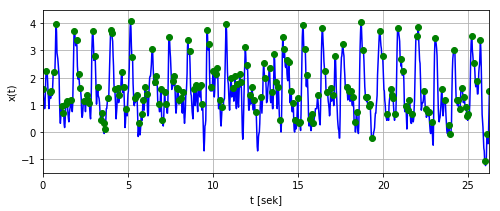

In [8]:
fig1 = plt.figure(1)
ax1 = plt.axes()
ax1.plot(t, x, 'b', t[ind, 0], x[ind, 0], 'go')
plt.xlabel('t [sek]')
plt.ylabel('x(t)')
plt.grid('on')
sz = fig1.get_size_inches()
# plt.figure(figsize=(8,5))
fig1.set_size_inches(8, 3)
sz2 = fig1.get_size_inches()
plt.axis([0, t[N - 1], -1.5, 4.5])
plt.savefig('photopl.png')
print(sz)
print(sz2)

Spectral analysis of the signal and filter design

Text(0.5,0,'f [Hz]')

Text(0,0.5,'Magnitude [dB]')

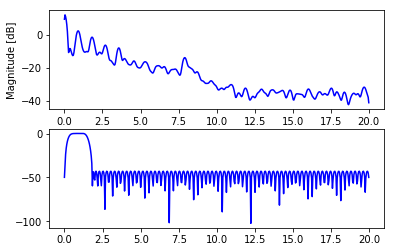

In [9]:
f, Pxx = signal.welch(x.reshape(1,x.size), fs, nperseg=256, nfft=1024,detrend=False,scaling='density')
Pxx=Pxx.reshape(Pxx.size,1)
f=f.reshape(f.size,1)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(f,10*np.log10(Pxx),'b')
plt.xlabel('f [Hz]')
plt.ylabel('Magnitude [dB]')

dt=0.55
pb=np.array([0, 0.58-dt, 0.58, 1.27, 1.27+dt, 20])/(40)
b=signal.remez(150,pb,[0,1,0],type='bandpass')
w,h=signal.freqz(b)
ax = fig.add_subplot(212)
ax.plot(w/(2*np.pi)*40,20*np.log10(np.abs(h)),'b')

plt.show()

6.3 Exercises

a) filter the pulse signal

In [10]:
y=signal.filtfilt(b,1,x.reshape(1,x.size))
y=y.reshape(y.size,1)


b) Plot spectra of original and filtered signal

Text(0.5,0,'f [Hz]')

Text(0,0.5,'Magnitude [dB]')

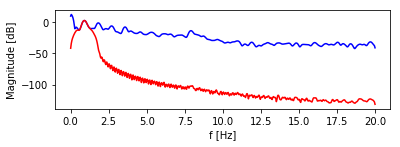

In [11]:
f2, Pxx2 = signal.welch(y.reshape(1,y.size), fs, nperseg=256, nfft=1024,detrend=False,scaling='density')
Pxx2=Pxx2.reshape(Pxx2.size,1)
f2=f2.reshape(f.size,1)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(f,10*np.log10(Pxx),'b',f2,10*np.log10(Pxx2),'r')
plt.xlabel('f [Hz]')
plt.ylabel('Magnitude [dB]')

c) Do the peak detection on the filtered signal

In [12]:
y=signal.filtfilt(b,1,x.reshape(1,x.size))
y=y.reshape(y.size,1)
ind2, peaks2 =findpeaks(y)
#plt.plot(t,y,'r',t[ind2,0],y[ind2,0],'go')

d) Visualise original and filtered signals with respective detections

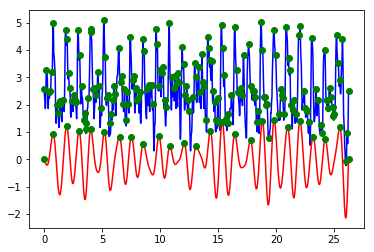

In [13]:
plt.plot(t,x+1,'b',t[ind,0],x[ind,0]+1,'go',t,y,'r',t[ind2,0],y[ind2,0],'go')

e) Determine heart rate

In [14]:
# Time difference between beats
tp=t[ind2,0]
d=np.diff(tp[1:-2],1,0) # s/b
d

array([[1.175],
       [1.05 ],
       [1.025],
       [1.175],
       [1.3  ],
       [1.025],
       [1.025],
       [1.35 ],
       [0.95 ],
       [1.225],
       [1.05 ],
       [1.2  ],
       [1.025],
       [1.1  ],
       [1.35 ],
       [1.025],
       [1.   ],
       [1.175],
       [1.075],
       [1.125],
       [1.05 ]])

In [15]:
# Mean heart rate
hr = np.mean(d); hr # s/b

1.1178571428571427

In [16]:
# Beats per minute
bpm = 1/(hr/60) # s/b/60s/min = 1/min/b
bpm

53.67412140575081

In [17]:
# Heart rate variability 
rrvar = np.std(d); rrvar

0.11342683218050048

Run py-file variant

Heart rate 53.67 bpm
Heart rate variability 0.11 s


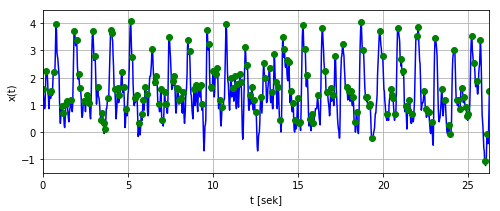

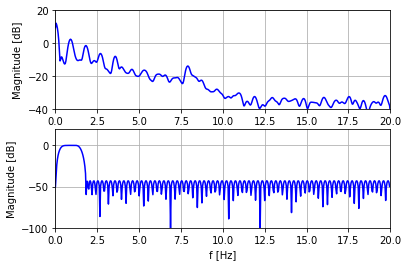

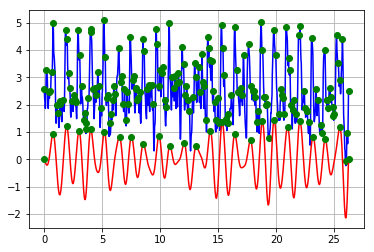

In [20]:
run pulsanalyse.py